In [1]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [78]:
# import necessary modules
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Flatten

In [73]:
# Change input layer to fit the CIFAR-10 dataset
input_tensor = Input(shape=(32, 32, 3))
# model = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=True)
model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)
# display model layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [116]:
model.output_shape

(None, 1, 1, 512)

In [118]:
for layer in model.layers:
    layer.trainable = False

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [120]:
x = Flatten()(model.output)
predictions = Dense(10, activation='softmax')(x)
# this is the model we will train
new_model = Model(inputs=input_tensor, outputs=predictions)
# compile the model (should be done *after* setting layers to non-trainable)
new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [123]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [124]:
os.chdir('/notebooks/src/CIFAR-10/')
from lib.load_images import load_data
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = load_data()

In [ ]:
history = new_model.fit(X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=.3,
    shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 1054s - loss: 14.5095 - acc: 0.0998 - val_loss: 14.4988 - val_acc: 0.1005
Epoch 2/10
35000/35000 [==============================] - 1057s - loss: 14.5095 - acc: 0.0998 - val_loss: 14.4988 - val_acc: 0.1005
Epoch 3/10
34432/35000 [============================>.] - ETA: 23s - loss: 14.5157 - acc: 0.0994

KeyboardInterrupt: 

In [87]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [95]:
X_train.shape

(50000, 32, 32, 3)

In [96]:
results = new_model.predict(X_train[:5000,:,:], verbose=1)

5000/5000 [==============================] - 105s   


In [111]:
results[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [105]:
predicted_class = np.argmax(results, axis=1)

In [106]:
predicted_class

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
history = new_model.fit(X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_split=.3,
    shuffle=True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
  128/35000 [..............................] - ETA: 2991s - loss: 11.8351 - acc: 0.0859

KeyboardInterrupt: 

In [88]:
os.chdir('/notebooks/src/CIFAR-10/')
from lib.load_images import load_data
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = load_data()

In [90]:
batch_size = 32
num_classes = 10
epochs = 100
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cnn_5_tf_outofbox.h5'

In [25]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x,verbose=1)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return a

In [ ]:
start=time.time()
result = model.predict(X_train, verbose=1)
end=time.time()

50000/50000 [==============================] - 1709s  


In [ ]:
start_test=time.time()
result_test = model.predict(X_test, verbose=1)
end_test=time.time()

10000/10000 [==============================] - 365s   


In [33]:
predicted_class = np.argmax(result_test, axis=1)

In [34]:
true_class = np.argmax(y_test, axis=1)

In [35]:
num_correct = np.sum(predicted_class == true_class)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [53]:
np.argmax(result_test,axis=1).shape

(10000, 1, 512)

In [41]:
num_correct

0

In [39]:
accuracy = float(num_correct)/result_test.shape[0]

In [40]:
accuracy

0.0

_____________________________

In [10]:
# BELOW IS PREDICTIONS ON RANDOM IMAGES

In [7]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [ ]:
img_path = 'Zoorashia_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
# pre-process the image
img_path = 'cat-insurance.jpg'

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img.shape

In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

In [ ]:
img = preprocess_input(img)
img.shape

In [ ]:
# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0][0]
print "Predicted Class: %s"%pred_class[1]
print "Confidance: %s"%pred_class[2]

In [ ]:
# pre-process the image
img_path = 'Zoorashia_elephant.jpg'

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img.shape

In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

In [ ]:
img = preprocess_input(img)
img.shape

In [ ]:
# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0][0]
print "Predicted Class: %s"%pred_class[1]
print "Confidance: %s"%pred_class[2]

In [62]:
# pre-process the image
img_path = 'its_me.jpg'

In [67]:
img = image.load_img(img_path, target_size=(224, 224))

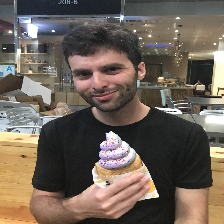

In [68]:
img

In [69]:
img = image.img_to_array(img)
img.shape

(224, 224, 3)

In [65]:
img = np.expand_dims(img, axis=0)
img.shape

img = preprocess_input(img)
img.shape

(1, 224, 224, 3)

In [ ]:
# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0][0]
print "Predicted Class: %s"%pred_class[1]
print "Confidance: %s"%pred_class[2]

In [ ]:
# pre-process the image
img_path = 'P3070105.JPG'

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img.shape

In [ ]:
img = np.expand_dims(img, axis=0)
img.shape

In [ ]:
img = preprocess_input(img)
img.shape

In [ ]:
# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0][0]
print "Predicted Class: %s"%pred_class[1]
print "Confidance: %s"%pred_class[2]

In [ ]:
decode_predictions()